# Parkinson's Law
## Quantifying Dissensus

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Setup Functions

In [53]:
def getOpinions():
    """
        Function randomly assigns opinion states to committee members
        Inputs:  None
        Returns: committee"""
    committee = np.zeros(N)
    for i in range(0,N):
        committee[i] = random.randint(0,1)
    return committee

def getLinks(N):
    """
       Function randomly assigns links between each node and k of its neighbours
       Inputs:  None
       Returns: links"""
    # Contingency for plots that iterate from N = 0 not N > k+1
    if N == k:
        links = np.zeros([N,k])
        x = k
    else:
        links = np.zeros([N,k+1])
        x = k+1
    
    # Create left-most collumn as an indicator of each node
    for i in range(0,N):
        links[i][0] = i
    
    # Link each node to k different random nodes and store these in a row with the node indicator
    for i in range(0,N):
        for j in range(1,x):
            n = 0
            while n < 1:
                if N == k:
                    choice = random.choice(range(0,N+1))
                else:
                    choice = random.choice(range(0,N))
                if choice != i and choice not in links[i]:
                    links[i][j] = int(choice)
                    n += 1
                else:
                    continue
    return links

# Trial
N = 10
k = 8
links = getLinks(N)
print(links)

[[0. 1. 5. 3. 6. 7. 2. 9. 4.]
 [1. 2. 7. 5. 6. 8. 4. 3. 9.]
 [2. 3. 9. 5. 8. 7. 6. 1. 4.]
 [3. 7. 6. 4. 8. 9. 1. 2. 5.]
 [4. 6. 8. 1. 5. 9. 2. 3. 7.]
 [5. 2. 8. 9. 6. 1. 7. 3. 4.]
 [6. 5. 1. 2. 9. 4. 8. 3. 7.]
 [7. 5. 6. 2. 8. 3. 1. 4. 9.]
 [8. 4. 6. 3. 5. 7. 2. 1. 9.]
 [9. 8. 3. 7. 1. 5. 4. 6. 2.]]


### Iterative Functions

In [54]:
def rewire(links):
    """
       Function rewires links with a probability 'e'
       Inputs:  links
       Returns: links"""
    if k == N:
        x = k
    else:
        x = k+1
    for i in range(0,N):
        for j in range(1,x):
            # Perform rewiring with likelihood e
            if random.random() >= (1-e):
                n = 0
                while n < 1:
                    choice = random.choice(range(0,N))
                    if choice != i and choice not in links[i]:
                        links[i][j] = int(choice)
                        n += 1
                    else:
                        continue
    # Check that no completely independent sub-graphs have formed
    graph = createGraph(links)
    visited = []
    DFS(visited,graph,0)
    for i in range(0,N):
        if i not in visited:
            rewire(links)
    return links

def newOpinions(committee, links, N):
    """
       Function re-evaluates opinion states if average opinion of connected nodes exceeds threshold
       Inputs:  committee, links
       Returns: links"""
    # Create random order
    order = 100*np.ones(N)
    n = 0
    while n < N:
        y = random.randint(0,N-1)
        if y not in order:
            order[n] = y
            n += 1
    
    # Iterate over each node
    for i in range(0,N):
        # Perform the iteration random-sequentially
        x = int(order[i])
        # Initialise arrays to count number of zeros and ones
        ops0 = np.zeros(k)
        ops1 = np.zeros(k)
        # Contigency for N < k+2
        if k == N:
            z = k-1
        else:
            z = k
        # Sum the ones and zeros held by connected nodes for each of N nodes
        for j in range(1,z):
            node = int(links[x][z])
            if committee[node] == 0:
                ops0[j] = int(1)
            elif committee[node] == 1:
                ops1[j] = int(1)
        # Calculate proportion of ones and zeros with respect to total number of connected nodes
        no = np.sum(ops0)/k
        yes = np.sum(ops1)/k
        # Change opinion if proportion in favour of majority is greater than threshold, h
        if no >= h:
            committee[x] = int(0)
        elif yes >= h:
            committee[x] = int(1)
        else:
            continue
    return committee

### DFS Functions

In [55]:
def createGraph(links):
    """
       Function creates a dictionary representation of array 'links' (manual test stage)
       Inputs:
       links    Adjacency matrix that stores connections between nodes
       Returns:
       graph   'Links' converted into a dictionary"""
    if k == N:
        x = k
    else:
        x = k+1
    graph = {}
    for i in range(0,N):
        graph[i] = i
        connections = np.zeros(k)
        for j in range(1,x):
            connections[j-1] = links[i][j] 
        graph[graph[i]] = connections
    return graph

def DFS(visited, graph, node):
    """
       Function traverses graph via connections and stores each node it visits
       Inputs:
       Graph    Any graph
       Node     Start node
       Visited  Array of visited nodes (initially none)
       Outputs:
       Visited"""
    if node not in visited:
        visited.append(node)
        for neighbour in graph[int(node)]:
            DFS(visited, graph, neighbour)
    return visited

### Simulations

[1. 0. 1. 0. 1. 1. 1. 1. 1.]
[[0. 5. 6. 7. 8. 3.]
 [1. 3. 4. 6. 7. 2.]
 [2. 8. 3. 6. 4. 1.]
 [3. 8. 1. 5. 7. 6.]
 [4. 5. 8. 7. 2. 3.]
 [5. 2. 3. 1. 6. 4.]
 [6. 4. 7. 5. 1. 8.]
 [7. 5. 6. 3. 1. 4.]
 [8. 5. 6. 2. 4. 3.]]


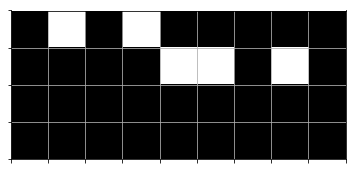

In [56]:
# Test variable set
N = 9
k = 5
e = 0.1
h = 0.6

# Establish random distribution of opinions and initial connections
committee = getOpinions()
print(committee)
links = getLinks(N)
print(links)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)

# Plot 2D opinion array to show evolution of committee opinion states
plt.imshow(opinions, cmap='Greys')
ax = plt.gca()
ax.set_xticks(np.arange(-.5,N,1))
ax.set_yticks(np.arange(-.5,4,1))
ax.set_xticklabels('')
ax.set_yticklabels('')
ax.grid()
plt.show()

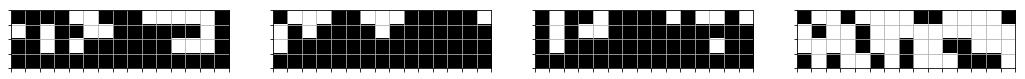

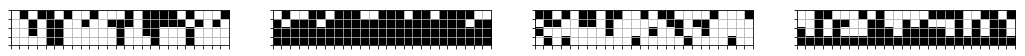

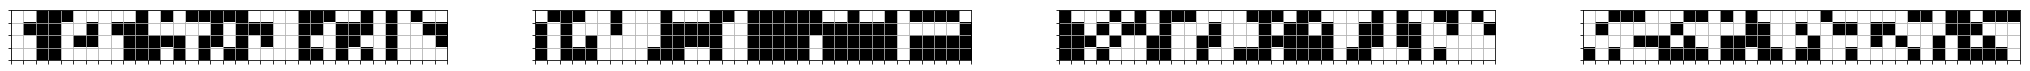

In [57]:
k = 8
e = 0.1
h = 0.6

fig1 = plt.figure(figsize=(18,18))

N = 15
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
a = fig1.add_subplot(1,4,1)
plt.imshow(opinions, cmap='Greys')
a = plt.gca()
a.set_xticks(np.arange(-.5,N,1))
a.set_yticks(np.arange(-.5,4,1))
a.set_xticklabels('')
a.set_yticklabels('')
a.grid()

N = 15
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
b = fig1.add_subplot(1,4,2)
plt.imshow(opinions, cmap='Greys')
b = plt.gca()
b.set_xticks(np.arange(-.5,N,1))
b.set_yticks(np.arange(-.5,4,1))
b.set_xticklabels('')
b.set_yticklabels('')
b.grid()

N = 15
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
c = fig1.add_subplot(1,4,3)
plt.imshow(opinions, cmap='Greys')
c = plt.gca()
c.set_xticks(np.arange(-.5,N,1))
c.set_yticks(np.arange(-.5,4,1))
c.set_xticklabels('')
c.set_yticklabels('')
c.grid()

N = 15
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
d = fig1.add_subplot(1,4,4)
plt.imshow(opinions, cmap='Greys')
d = plt.gca()
d.set_xticks(np.arange(-.5,N,1))
d.set_yticks(np.arange(-.5,4,1))
d.set_xticklabels('')
d.set_yticklabels('')
d.grid()

plt.show()

fig2 = plt.figure(figsize=(18,18))

N = 25
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
a = fig2.add_subplot(2,4,1)
plt.imshow(opinions, cmap='Greys')
a = plt.gca()
a.set_xticks(np.arange(-.5,N,1))
a.set_yticks(np.arange(-.5,4,1))
a.set_xticklabels('')
a.set_yticklabels('')
a.grid()

N = 25
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
b = fig2.add_subplot(2,4,2)
plt.imshow(opinions, cmap='Greys')
b = plt.gca()
b.set_xticks(np.arange(-.5,N,1))
b.set_yticks(np.arange(-.5,4,1))
b.set_xticklabels('')
b.set_yticklabels('')
b.grid()

N = 25
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
c = fig2.add_subplot(2,4,3)
plt.imshow(opinions, cmap='Greys')
c = plt.gca()
c.set_xticks(np.arange(-.5,N,1))
c.set_yticks(np.arange(-.5,4,1))
c.set_xticklabels('')
c.set_yticklabels('')
c.grid()

N = 25
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
d = fig2.add_subplot(2,4,4)
plt.imshow(opinions, cmap='Greys')
d = plt.gca()
d.set_xticks(np.arange(-.5,N,1))
d.set_yticks(np.arange(-.5,4,1))
d.set_xticklabels('')
d.set_yticklabels('')
d.grid()

plt.show()

fig3 = plt.figure(figsize=(36,36))

N = 35
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
a = fig3.add_subplot(3,4,1)
plt.imshow(opinions, cmap='Greys')
a = plt.gca()
a.set_xticks(np.arange(-.5,N,1))
a.set_yticks(np.arange(-.5,4,1))
a.set_xticklabels('')
a.set_yticklabels('')
a.grid()

N = 35
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
b = fig3.add_subplot(3,4,2)
plt.imshow(opinions, cmap='Greys')
b = plt.gca()
b.set_xticks(np.arange(-.5,N,1))
b.set_yticks(np.arange(-.5,4,1))
b.set_xticklabels('')
b.set_yticklabels('')
b.grid()

N = 35
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
c = fig3.add_subplot(3,4,3)
plt.imshow(opinions, cmap='Greys')
c = plt.gca()
c.set_xticks(np.arange(-.5,N,1))
c.set_yticks(np.arange(-.5,4,1))
c.set_xticklabels('')
c.set_yticklabels('')
c.grid()

N = 35
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
d = fig3.add_subplot(3,4,4)
plt.imshow(opinions, cmap='Greys')
d = plt.gca()
d.set_xticks(np.arange(-.5,N,1))
d.set_yticks(np.arange(-.5,4,1))
d.set_xticklabels('')
d.set_yticklabels('')
d.grid()

plt.show()

In [58]:
def getOpinions(S_i, N):
    """
        Function assigns opinion states to committee members
        Inputs: None
        Returns: committee"""
    order = np.ones(N)*100
    for i in range(0,N):
        n = 0
        while n < 1:
            choice = random.randint(0,N-1)
            if choice not in order:
                order[i] = choice
                n += 1
            else:
                continue
        
    committee = np.zeros(N)
    for i in range(0,S_i):
        committee[int(order[i])] = 1
    return committee

Text(0,0.5,'D(N)')

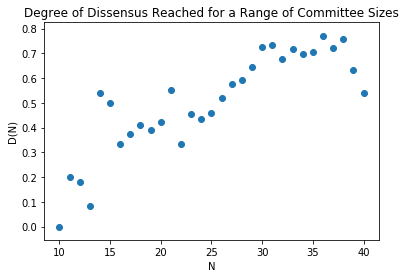

In [60]:
k = 8
h = 0.6
e = 0.1

iters = 40

D_N = np.zeros(iters - k-1)
for N in range(k+2,iters):
    d_N = np.zeros(N)

    for i in range(0,N):
        S_i = i
        committee = getOpinions(S_i, N)
        links = getLinks(N)

        opinions = np.zeros((4,N))

        for j in range(1,4):
            committee = newOpinions(committee, links, N)
            opinions[j] = committee
            links = rewire(links)

        S_f = np.sum(np.where(committee==1,1,0))

        y = np.array((S_f, N-S_f))
        x = 1 - np.max(y)/N
        if x > 0:
            x = 1
        elif x == 0:
            x = 0
        else:
            x = 0
        d_N[i] = x
     
    D = np.mean(d_N)
    D_N[N-k-1] = D
 
N = np.zeros(iters - k-1)
for i in range(k+2,iters+1):
    N[i - k-2] = i
    
plt.scatter(N, D_N)
plt.title('Degree of Dissensus Reached for a Range of Committee Sizes')
plt.xlabel('N')
plt.ylabel('D(N)')

I have now managed to create a plot that matches expectation, so I will use this modified approache to gather my results. I do now even see consensus always being reached when N < 10. 

I corrected the code by only running it for N > k+1 and fixing the DFS error from the previous attempt above. It would therefore seem that the change I made to the 'newOpinions' function at the beginning of this logbook was the main contributer to getting results that more closely resemble expectation and those given in the paper cited by the project description.

### Figures for Report

In [61]:
def getOpinions():
    """
        Function randomly assigns opinion states to committee members
        Inputs: None
        Returns: committee"""
    committee = np.zeros(N)
    for i in range(0,N):
        committee[i] = random.randint(0,1)
    return committee

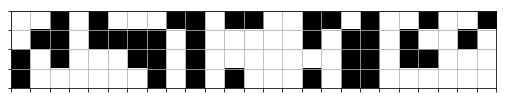

Percentage of shared opinions among connected nodes: 75.11111111111111 %


In [75]:
k = 8
e = 0.1
h = 0.6

fig1 = plt.figure(figsize=(40,80))

N = 25
# Establish random distribution of opinions and initial connections
committee = getOpinions()
links = getLinks(N)

# Initialise 2D opinion array
opinions = np.zeros((4,N))
opinions[0] = committee

# Iterate re-evaluation and re-wiring 3 times
for i in range(1,4):
    committee = newOpinions(committee, links, N)
    opinions[i] = committee
    links = rewire(links)
    
a = fig1.add_subplot(1,4,1)
plt.imshow(opinions, cmap='Greys')
a = plt.gca()
a.set_xticks(np.arange(-.5,N,1))
a.set_yticks(np.arange(-.5,4,1))
a.set_xticklabels('')
a.set_yticklabels('')
a.grid()
plt.show()

# Calculate percentage of nodes that share the opinion state of the majority
averages = np.zeros(N)
zeros = 0
ones = 0
for i in range(0,N):
    for j in range(0,k+1):
        node = int(links[i][j])
        if committee[node]==0:
            zeros += 1
        elif committee[node]==1:
            ones +=1
    perc = (np.max((zeros,ones))/(k+1))*100
averages[i] = perc
print('Percentage of shared opinions among connected nodes:', np.mean(averages), '%')